In [1]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import argparse
import pickle
import os
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from IPython.display import clear_output
from keras.callbacks import EarlyStopping
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from  keras.utils.vis_utils import plot_model

Using TensorFlow backend.
/Users/shreya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [31]:
with open('newPapers/X_2010.bin', 'rb') as f:
    X_2010 = pickle.load(f)


In [32]:
with open('newPapers/y_2010.bin','rb') as f:
    y_2010 = pickle.load(f)
#     y = [citationCounts[n][2008] for n in citationCounts.keys()]

In [33]:
with open('newPapers/X_2008.bin', 'rb') as f:
    X_2008 = pickle.load(f)

In [34]:
with open('newPapers/y_2008.bin', 'rb') as f:
    y_2008 = pickle.load(f)

In [35]:
with open('newPapers/X_2006.bin', 'rb') as f:
    X_2006 = pickle.load(f)

In [36]:
with open('newPapers/y_2006.bin', 'rb') as f:
    y_2006 = pickle.load(f)

In [38]:
X = X_2010+X_2008+X_2006
y = y_2010+y_2008+y_2006
# X.extend(X_2010).extend(X_2008).extend(X_2006)
# y.extend(y_2010).extend(y_2008).extend(y_2006)

In [39]:
X_train = np.array(X)
y_train= np.array(y)
# X_train = np.array(X[:-1000])
# y_train= np.array(y[:-1000])

In [40]:
# X_test = np.array(X[-1000:])
# y_test = np.array(y[-1000:])

In [22]:
with open('newPapers/targetRefNodesDictionary2006.bin', 'rb') as f:
    t = pickle.load(f)

In [41]:
# Plot training curves

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [48]:
model = Sequential()
model.add(Dense(256, input_dim=96, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='linear'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               24832     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 51        
Total params: 43,939.0
Trainable params: 43,939
Non-trainable params: 0.0
_________________________________________________________________


In [49]:
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['mae','mean_squared_logarithmic_error'])

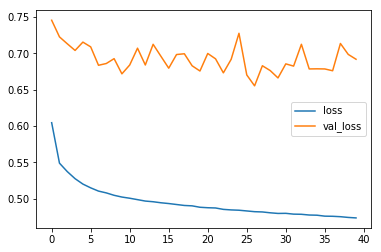

615238/615238 [==============================] - 3s - loss: 0.4735 - mean_absolute_error: 1.7794 - mean_squared_logarithmic_error: 0.4735 - val_loss: 0.6920 - val_mean_absolute_error: 2.1590 - val_mean_squared_logarithmic_error: 0.6920


In [50]:
history = model.fit(X_train, y_train, epochs=40, batch_size=8192,  verbose=1,callbacks=[plot_losses], validation_split=0.2,shuffle=True)

In [ ]:
X[3]

In [38]:
model.evaluate(x=X_test, y=y_test)

  32/1000 [..............................] - ETA: 0s

[0.3471934667825699, 1.4475258226394654, 0.3471934667825699]

In [59]:
model.predict(X[20:30])

array([[0.67660576, 1.3025644 , 0.8835896 ],
       [0.17025396, 0.4417398 , 0.36753258],
       [0.26742637, 0.6587133 , 0.54299605],
       [1.0318372 , 3.242316  , 2.8962262 ],
       [0.21714646, 0.66193837, 0.61342764],
       [0.24546152, 0.6991434 , 0.62140256],
       [0.3373582 , 1.1895236 , 1.1636416 ],
       [0.10130154, 0.28414932, 0.28521785],
       [0.6129062 , 1.9714113 , 1.875563  ],
       [0.1672439 , 0.4463603 , 0.38366485]], dtype=float32)

In [60]:
y[20:30]

[[0, 3, 3],
 [0, 0, 1],
 [0, 1, 1],
 [0, 2, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 3, 0],
 [0, 0, 0],
 [3, 3, 2],
 [0, 0, 0]]

In [67]:
y[1]

[0, 0, 0]

In [69]:
y[3]

[0, 1, 0]

In [72]:
y[3]

[0, 1, 0]

In [68]:
# plot_model(model, to_file='model.png',show_shapes=True)

SVG(model_to_dot(model).create(prog='dot', format='svg'))

AttributeError: module 'pydot' has no attribute 'find_graphviz'